Single sample plotting tutorial
============================

Welcome to the RNAvigate tutorials. Here I will demonstrate and explain some
of the functionality of RNAvigate. In this Jupyter Notebook example, we'll
explore:

* How to set up the environment
* How to load experimental data
* How to use basic plotting functions
* A few of the data filters available to plotting functions

How to set up the environment
-----------------------------
This section is very simple. First, we need to tell Jupyter to display plots
in this window when we tell it to. We do this with command `%matplotlib inline`.
Next, we tell Jupyter that we need access to the rnavigate code, and give it
an alias `MaP` with `import rnavigate as MaP`.

In [1]:
%matplotlib inline
import rnavigate as MaP

How to load experimental data
-----------------------------
RNAvigate is built around the `MaP.Sample` object, which defines the datasets
that are associated to a particular experimental sample. The first step to
quickly performing vizualization and analysis is to create a `MaP.Sample` object.
All of the parameters are optional. Here is a breif explanation of each:

sample

* Any string which will be the label used on charts. It should succinctly
  describe the experiment.
* e.g. "H.sapiens RNaseP - DMS-MaP"

log

* This is a shapemapper_log.txt file that is output from ShapeMapper2. This
  file includes important quality control metrics for the sequencing
  experiment if the `--per-read-histograms` was used.

profile

* This is a profile.txt file which is the main data output from ShapeMapper2.
  It includes all of the most important information for assessing a SHAPE or
  DMS-MaP experiment.

rings

* The only default output file of RingMapper. The extension is specified when
  executing RingMapper, typically .corrs or rings.txt.

pairs

* A pairmap.txt file from PairMapper.

allcorrs

* An allcorrs.txt file from PairMapper.

dance_prefix

* The file prefix provided to DanceMapper and/or foldClusters. MaP.Sample
  will locate each of the following for each component if it exists:

  * reactivities.txt
  * rings.txt
  * pairmap.txt
  * allcorrs.txt
  * foldClusters outputs:

    * .f.ct - if `--pk` was used.
    * .dp - if `--probs` was used.
    * .ct - if default folding was performed.

rnp

* An rnpmap.csv file from RNP-MaP

deletions

* A deletions.txt file from ShapeJumper.

fasta

* The fasta reference file used for ShapeJumper.

probs

* A .dp file from SuperFold or from ProbabilityPlot.

ct and compct

  * A .ct (connection table) or .dbn (dot-bracket) containing base-pairing info.

ss

* A .cte or .nsd file from StructureEditor
* A .varna file from VARNA
* A .xrna file from XRNA

pdb

* A .pdb file containing the RNA of interest.

pdb_kwargs

* A dictionary {} of keyword:argument pairs (kwargs) to help parse the .pdb file. PDB files are notoriously picky.
* `"chain":"A"` indicates that chain "A" contains the RNA. This argument is usually necessary. Default is empty " ".
* `"fasta":"my_rna.fasta"` provides the sequence. This is included in the header of most PDB structures, so is not typically needed.
* `"offset":14` This would indicate that residue 15 of chain A corresponds to the 1st nucleotide of the sequence. This is unusual in .pdb files, but watch out for it.


In [2]:

example = MaP.Sample(sample       = "Example Data",
                     log          = "data/example2_shapemapper_log.txt",
                     profile      = "data/example2_rnasep_profile.txt",
                     rings        = "data/example2-rnasep.corrs",
                     pairs        = "data/example2-rnasep-pairmap.txt",
                     dance_prefix = "data/example2_rnasep",
                     deletions    = "data/example-rnasep-deletions.txt",
                     fasta        = "data/RNaseP-noSC.fasta",
                     probs        = "data/rnasep.dp",
                     ct           = "data/RNaseP.ct",
                     ss           = "data/RC_CRYSTAL_STRUCTURE.xrna",
                     pdb          = "data/3dhsCrystal_PlusLoops.pdb",
                     pdb_kwargs   = {"chain":"A"}
                     )

How to use basic plotting functions
-----------------------------------
Once we have define a `MaP.Sample` and given it a name (above we named ours `example`),
we have access to many plotting functions. Depending on the data that we provided, some may not work.

First, lets check our data quality (provided by `log` and `profile` files).


### Quality control plot

This plot renders three panels:

1) Mutations per molecule: this rightward shift of the blue line (Modified)
  tells us that there is sufficient mutation rate above background. The blue
  line is centered at about 4.5, which is sufficient but slightly low for
  correlations and deconvolution (RING-MaP, PAIR-MaP, DANCE-MaP). This number
  will shift based on the length of the reads, the reactivity of the probe, and
  the degree of base-pairing or rigidness of the RNA structure.
2) Read lengths: Both blue and orange bars contain the expected read length for
  our amplicon with few shorter fragments, which are likely the result of sequencing
  quality dips that prevent R1 and R2 merging. Fragmented data sets will have a
  broader distribution.
3) Per-nucleotide mutation rate distribution: This split violin chart shows that
  the Untreated sample's per-nucleotide mutation rate is clustered tightly near
  zero. In contrast the Modified sample has mutation rates approaching 15%.

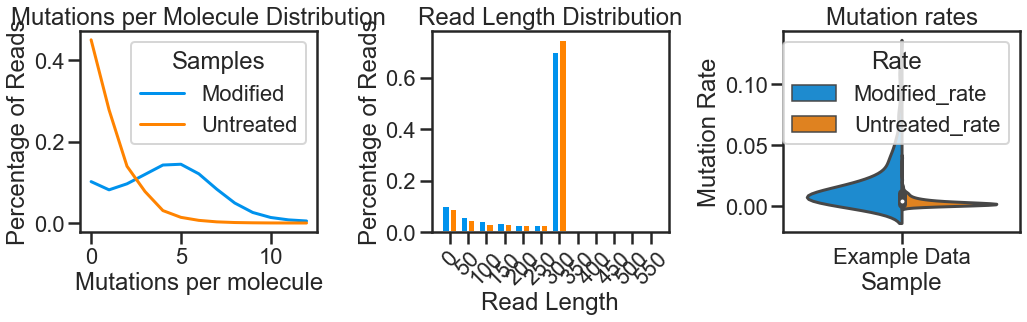

In [3]:
example.make_qc();

### ShapeMapper2 plots

Next we'll want to take a look at our profile information more in-depth. The standard ShapeMapper2 plots give us a lot of insight.

1) The first panel gives us a basic view of where the RNA is most reactive. The pattern below is indicative of a rigid and highly base-paired RNA.
2) The second panel gives us raw mutation rates for the untreated and modified RNA samples. Here we see a large signal over background.
3) The third panel tells us how many reads we collected for this RNA. Here we have 800,000 reads evenly covering the entire RNA. This will be sufficient for correlation and deconvolution.

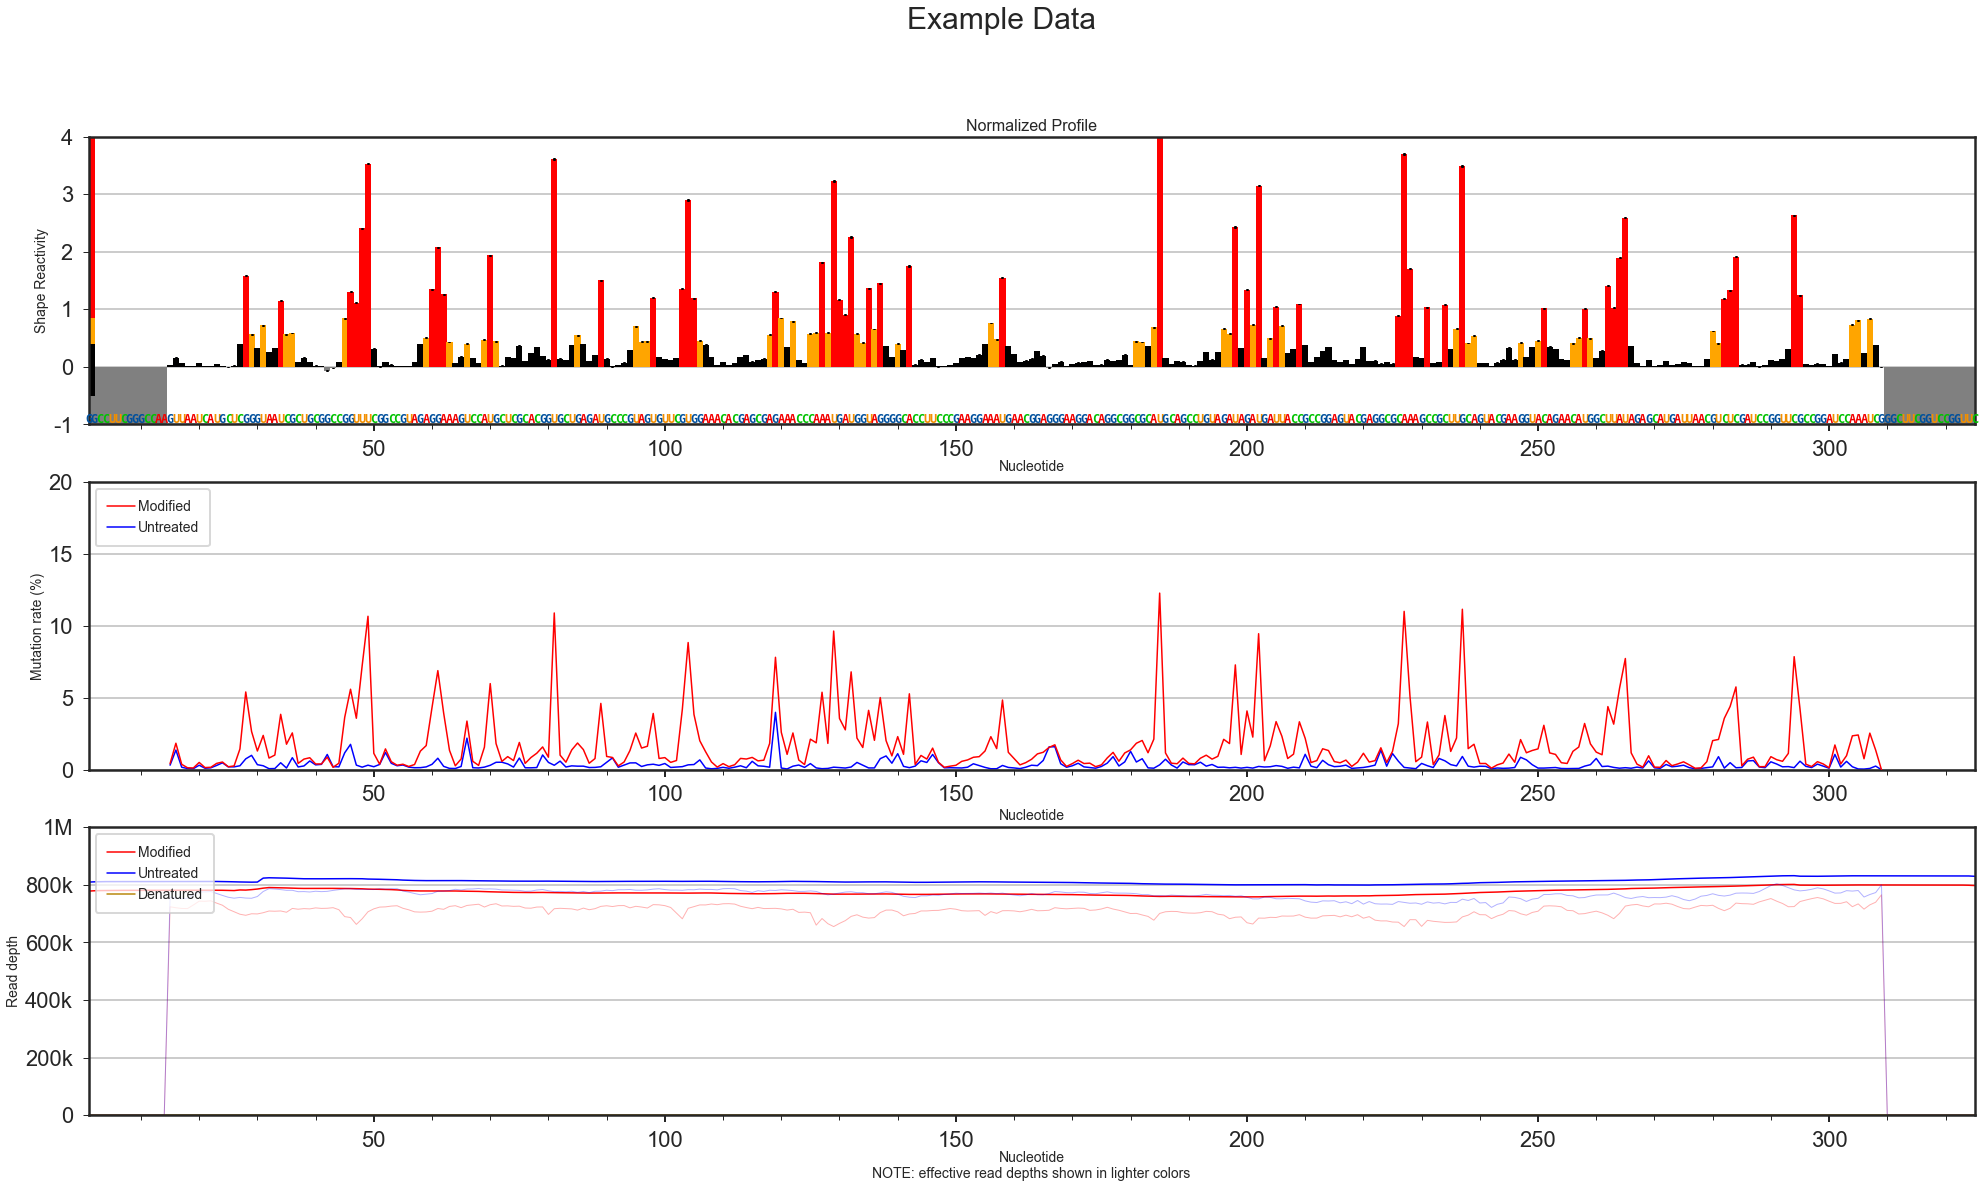

In [4]:
example.make_shapemapper()

### Skyline plots

Another way to view this info quickly and more flexibly is the skyline plot,
also called a step plot. With these, you can view any per-nucleotide
information. Later on we will see how these plots are usefule to compare data
from multiple samples. Below is an example of how to display the same
information as in the shapemapper plot using skyline.

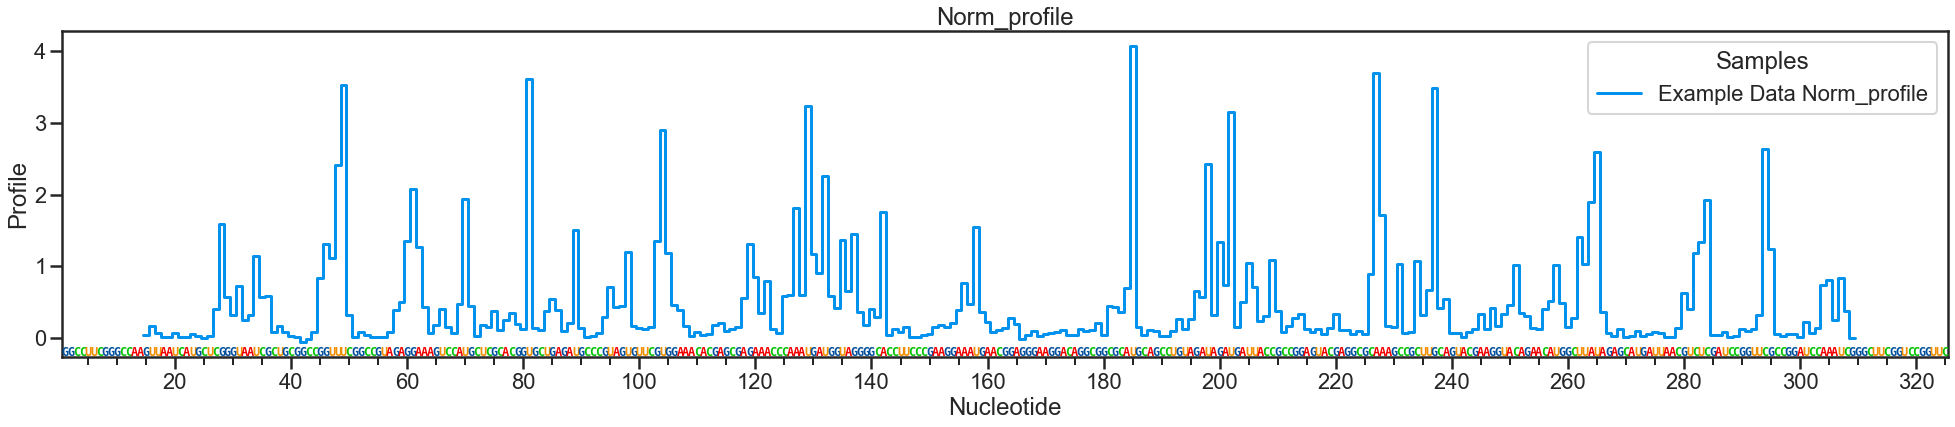

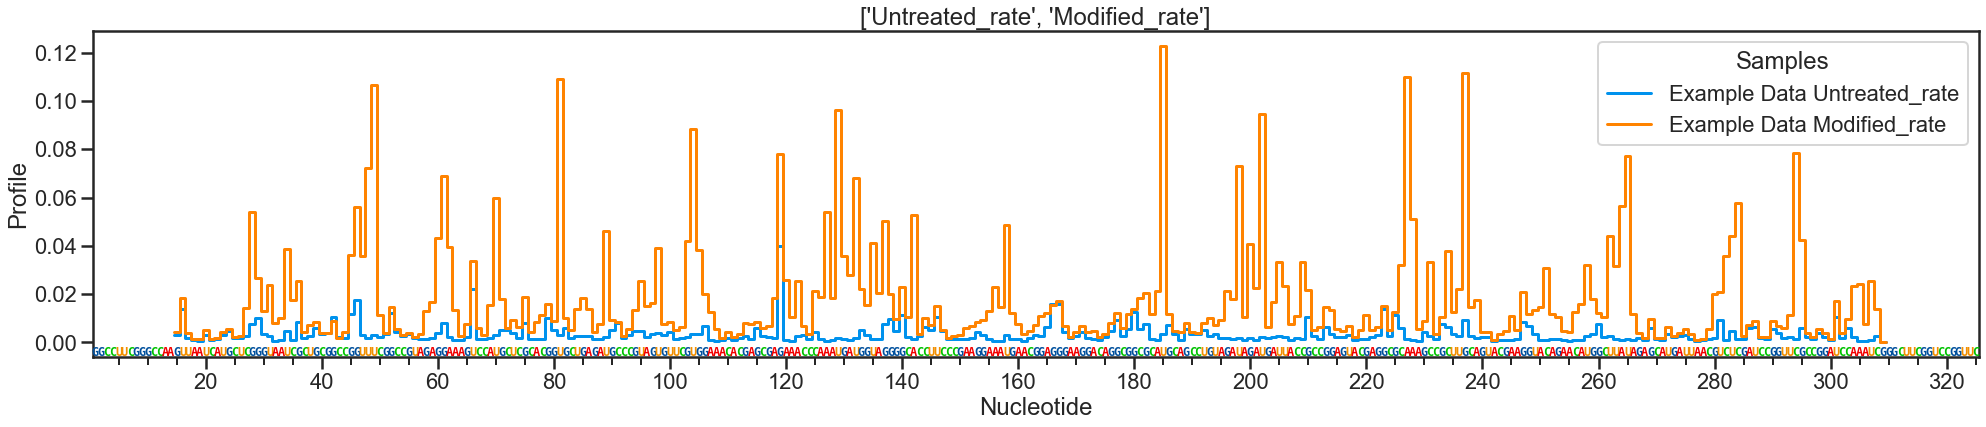

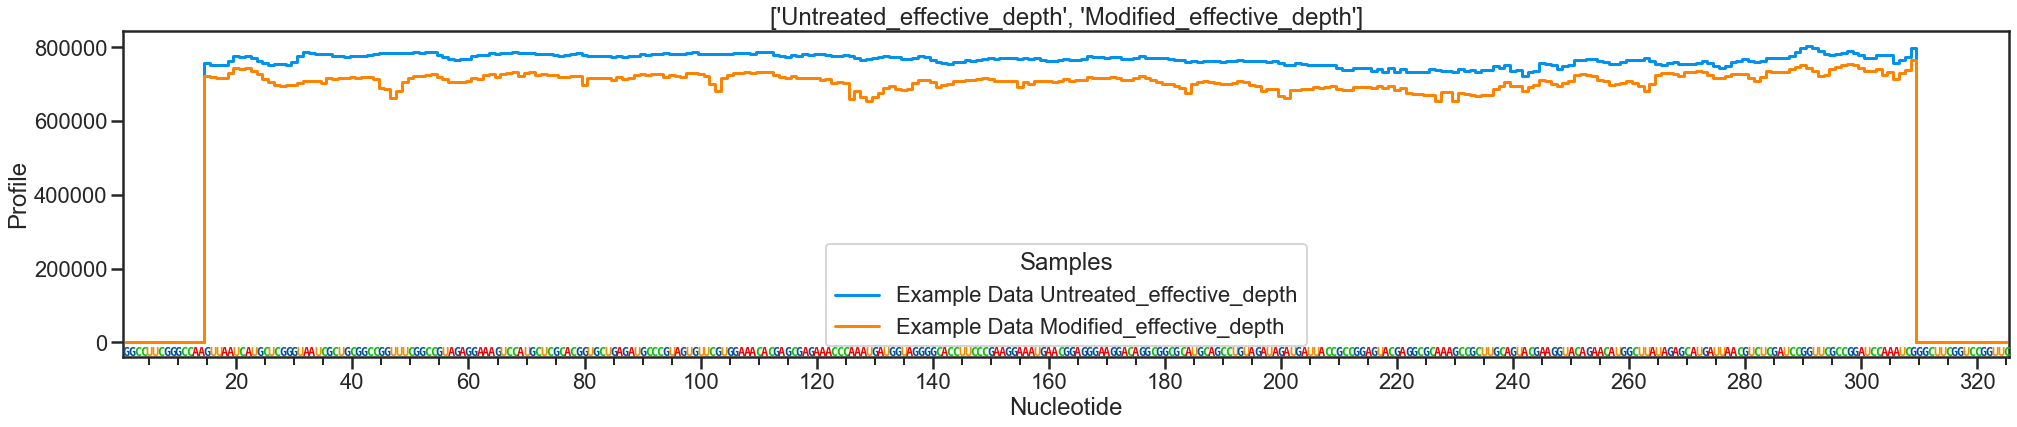

In [5]:
example.make_skyline(columns="Norm_profile")
example.make_skyline(columns=["Untreated_rate", "Modified_rate"])
example.make_skyline(columns=["Untreated_effective_depth", "Modified_effective_depth"])

### Arc plots

Arc plots are a very flexible way to visualize multiple layers of information.
Previous plots told us that these data should produce useful correlations. Lets
take a look at those here.

By default, arc plots will display the ct struture and profile if those data
are present. All we need to do is specify the type of inter-nucleotide data we
want to display and pass that to `ij`. This can be any data which links two
nucleotides (i and j), including correlations ('rings', 'pairs', 'allcorrs'),
JuMPs ('deletions'), pairing-probabilities ('probs'), or base-pairing
('ct' or 'compct').

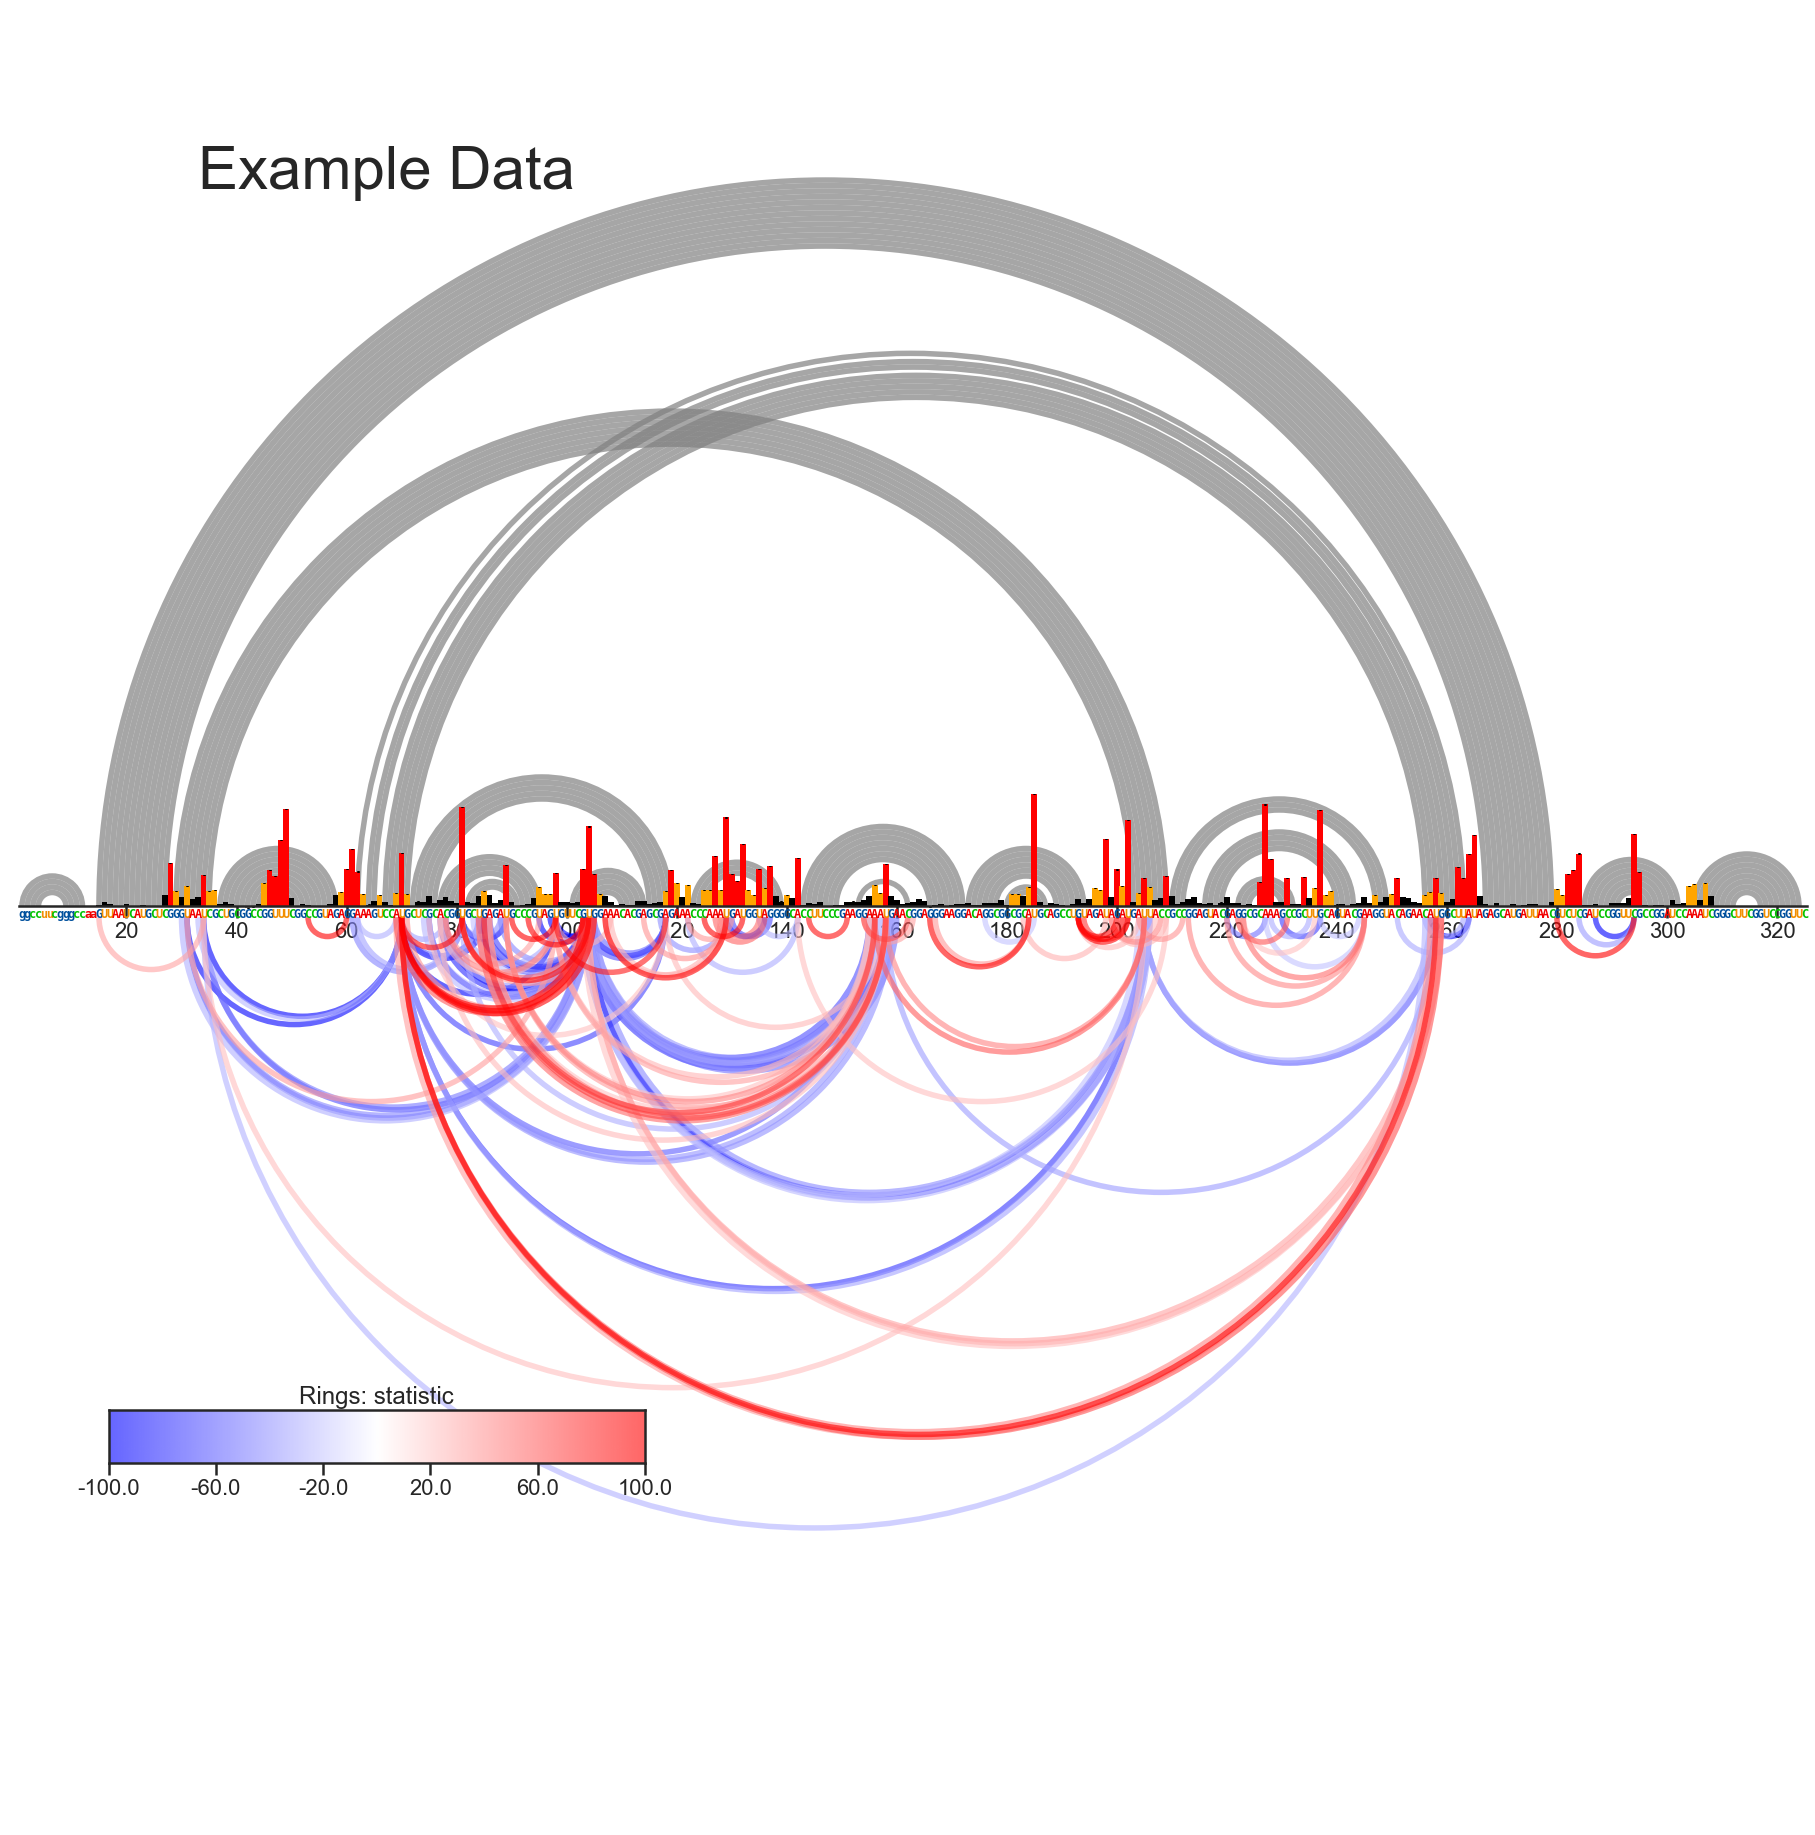

In [6]:
example.make_ap(ij="rings");


Negative correlations are hard to decifer, and often low statistic positive
correlations are overwhelming. In addition, correlations that reflect secondary
structures are not interesting to us right now. Let's see how we can filter
these out.

There are many filters that can be applied to these data. See the data filtering
tutorial for a guide on how to use these. For now, the ones we need are
`positive_only=True` and `Statistic_ge=23`. The "ge" here means "greater than or
equal to" 23. We'll also use `cdAbove=14` which removes correlations that are
nearby in secondary structure according to contact distance.

Using these filters in combination, a loop-loop interaction between
nucleotides 85 and 155 becomes apparent.

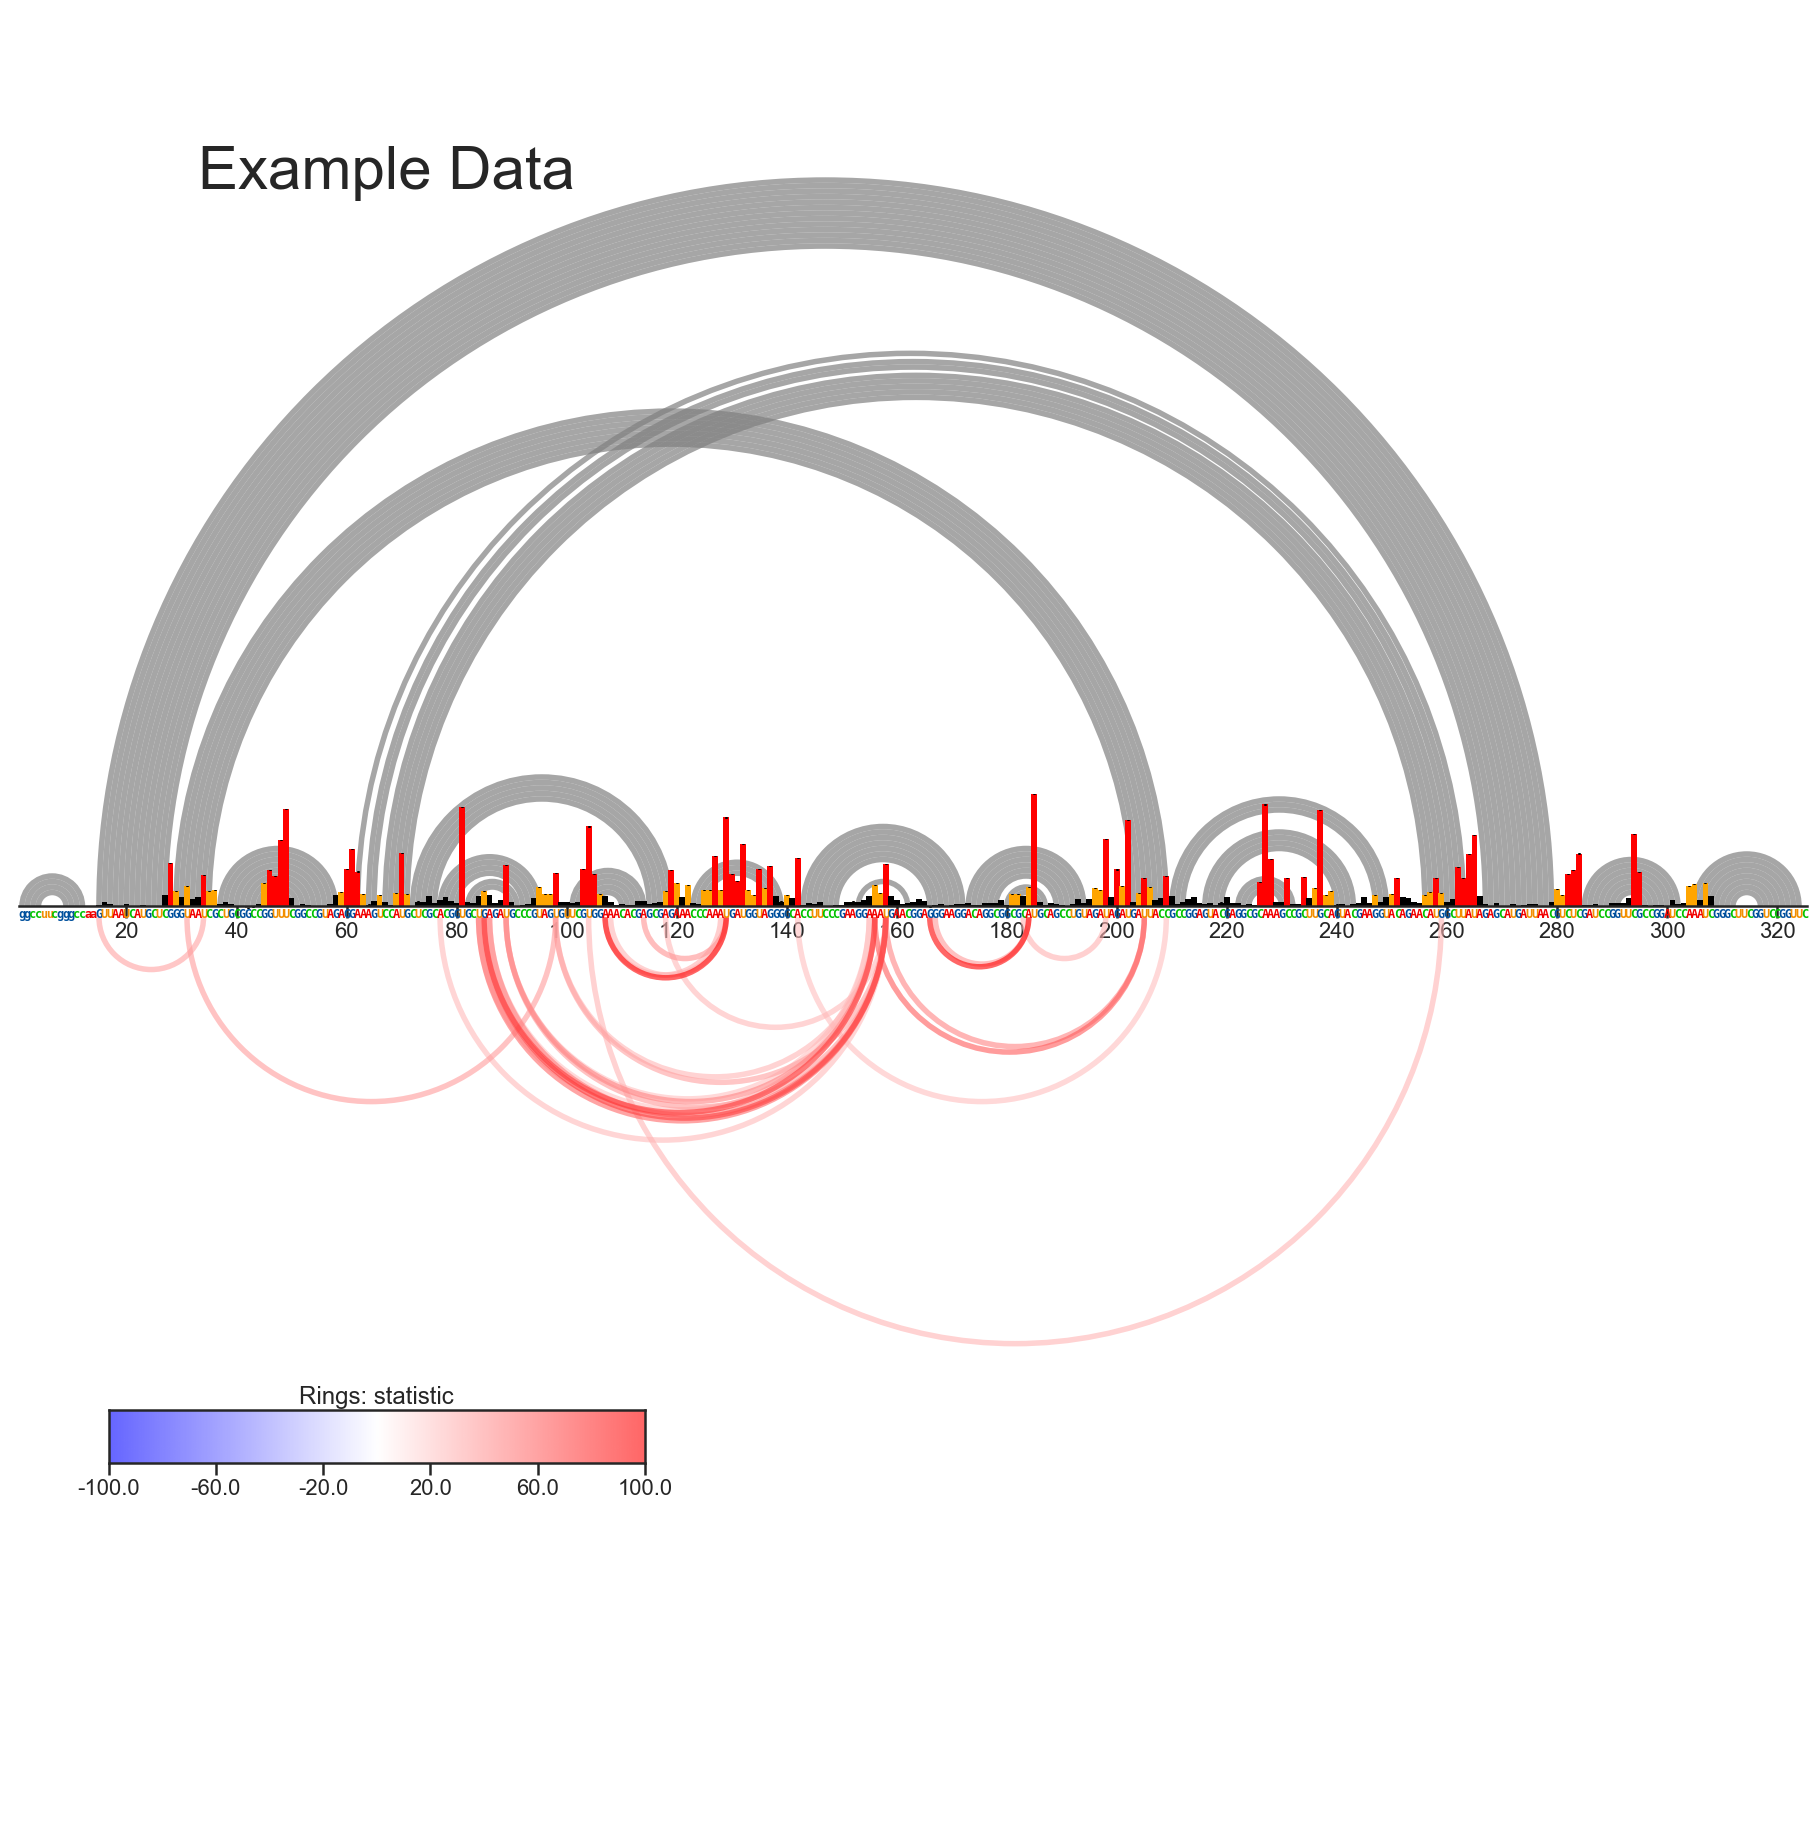

In [7]:
example.make_ap(ij="rings", positive_only=True, Statistic_ge=23, cdAbove=14)

### Circle plot

This type of plot is usually less clear than an arc plot, but it can be useful
in cases where we are mostly interested in one data type, and we need to fit an
arbitrarily large RNA in a square area.

This plot accepts the same filtering scheme used in the example above.

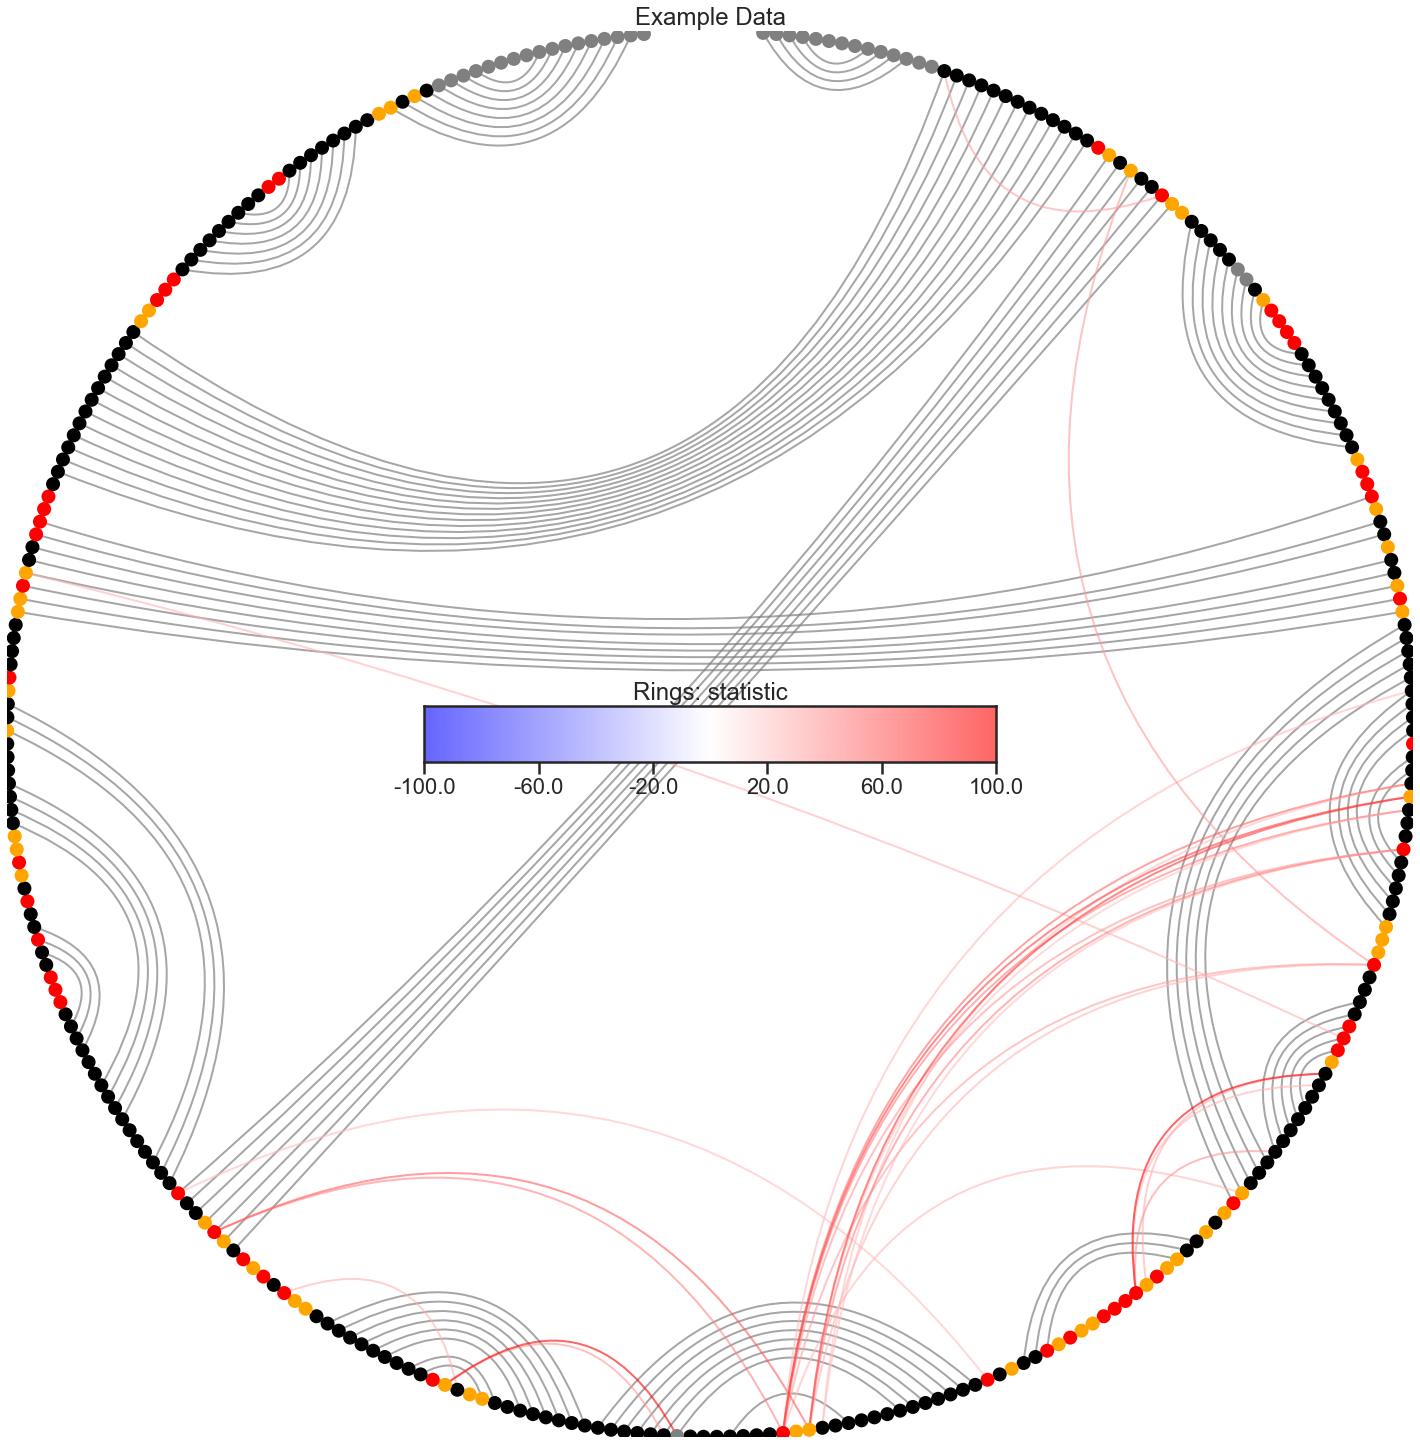

In [8]:
example.make_circle(ct="ct", profile="profile", ij="rings", positive_only=True, Statistic_ge=23, cdAbove=14)

### Secondary structure diagrams

Another interesting way to display these data are on secondary structure
drawings. This particular drawing was custom drawn to mirror the tertiary
structure for this RNA. Here it it is very apparent that the loop-loop
interaction (between the bottom two loops) that we have been seeing is
informative of the true tertiary structure.

This plot also accepts the same filtering scheme used in the examples above.

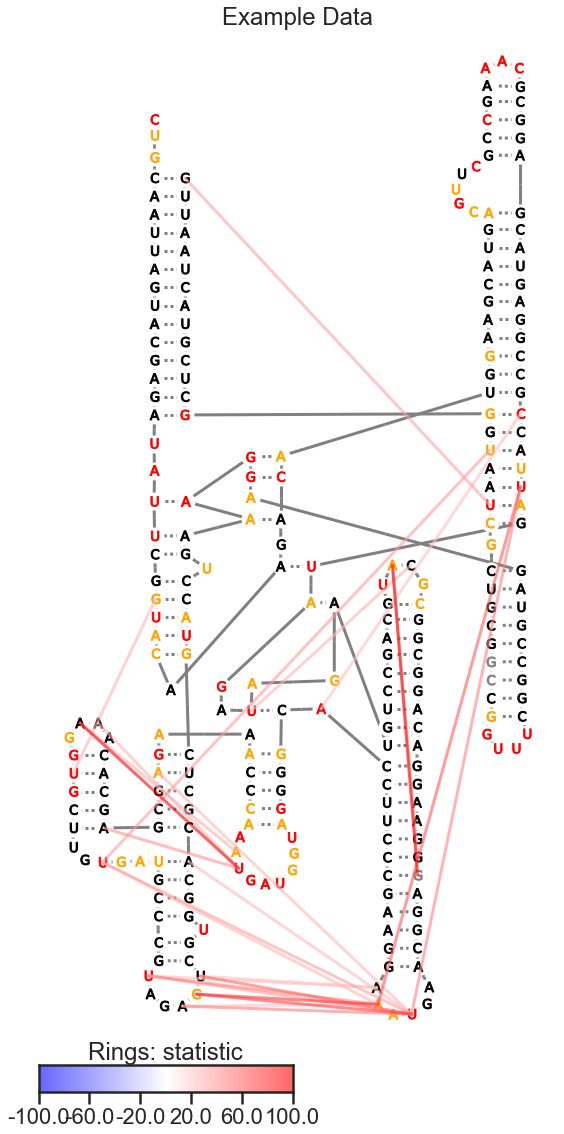

In [9]:
example.make_ss(ij="rings", colors="profile", apply_color_to="sequence",
                positive_only=True, Statistic_ge=23, cdAbove=14)


### 3D molecule interactive plots

The above secondary structure drawing is very informative, but it was manually
drawn using XRNA, which can be a time-consuming process. Sometimes it is best
to simply plot these data directly on the 3D structure.

This plot also accepts the same filtering scheme used in the examples above.

Controls:

* click and drag to rotate
* mouse scroll or right click to zoom
* 3rd mouse button and drag to pan

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

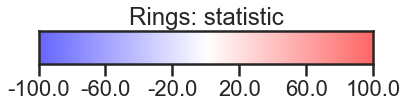

In [10]:
example.make_mol(ij="rings", nt_color="profile", positive_only=True, Statistic_ge=23, cdAbove=14)


Heatmap and contour plot
------------------------

Next, we will take a look at our SHAPE-JuMP data set. These data can also be
overwhelming, but it provides rich data on which nucleotides are close in 3D
space. To demonstrate this, we can look at how these deletions align with the
known 3D structure in the form of a heatmap + contour plot. The heat map
displays our deletion data from the SHAPE-JuMP experiment, and the contour plot
displays regions which are within 20 angstroms.

Red areas indicate high rates of deletions detected. In the plot below we can
see that these tend to cluster around close-in-space regions.

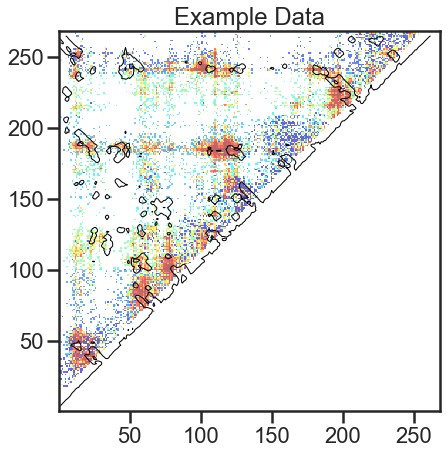

In [11]:
example.make_heatmap(structure="pdb", ij="deletions")

### Distance histograms

These histograms compare the distribution of pairwise distances in our PDB
structure to those of the deletions from SHAPE-JuMP. The most information
is contained in the most abundantly detected deletions. We can apply the filter
`Percentile=0.99` to only view the top 99th percentile deletions.

These data and this filter can be displayed on the arc plots, circle plots,
secondary structure drawings, and 3D molecules shown above as well.

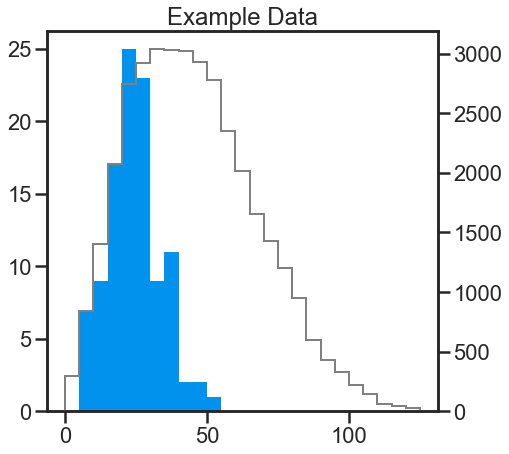

In [12]:
example.make_disthist(structure="pdb", ij="deletions", Percentile=0.99)